24RP14127

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score


In [24]:
df=pd.read_csv("BankNote_Authentication.csv")

In [25]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df.isnull()

,variance,skewness,curtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


In [27]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [28]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler((-1, 1))
scal = scaler.fit_transform(X_train, y_train)

In [51]:
scal

array([[-0.06636234,  0.13681351, -0.66914057,  0.38620258],
       [ 0.08398849,  0.28222955, -0.9348907 , -0.15876647],
       [ 0.16930244,  0.65699147, -0.6670016 ,  0.28792703],
       ...,
       [-0.9991779 ,  0.72620834, -0.53190649, -0.25147749],
       [-0.48343177,  0.23205873, -0.5322765 ,  0.4052863 ],
       [-0.46867721, -0.51111144,  0.44063272,  0.48955157]])

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9781818181818182


In [64]:
y_test

430     0
588     0
296     0
184     0
244     0
       ..
1341    1
1100    1
620     0
617     0
602     0
Name: class, Length: 275, dtype: int64

In [82]:
X_train

,variance,skewness,curtosis,entropy
529,-1.38850,12.5026,0.69118,-7.548700
243,2.77440,6.8576,-1.06710,0.075416
1309,-4.28870,-7.8633,11.83870,-1.897800
664,5.35860,3.7557,-1.73450,1.078900
745,0.75736,3.0294,2.91640,-0.068117
...,...,...,...,...
1095,1.16400,3.9130,-4.55440,-3.867200
1130,-2.29180,-7.2570,7.95970,0.921100
1294,-7.03640,9.2931,0.16594,-4.539600
860,-3.46050,2.6901,0.16165,-1.022400


In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

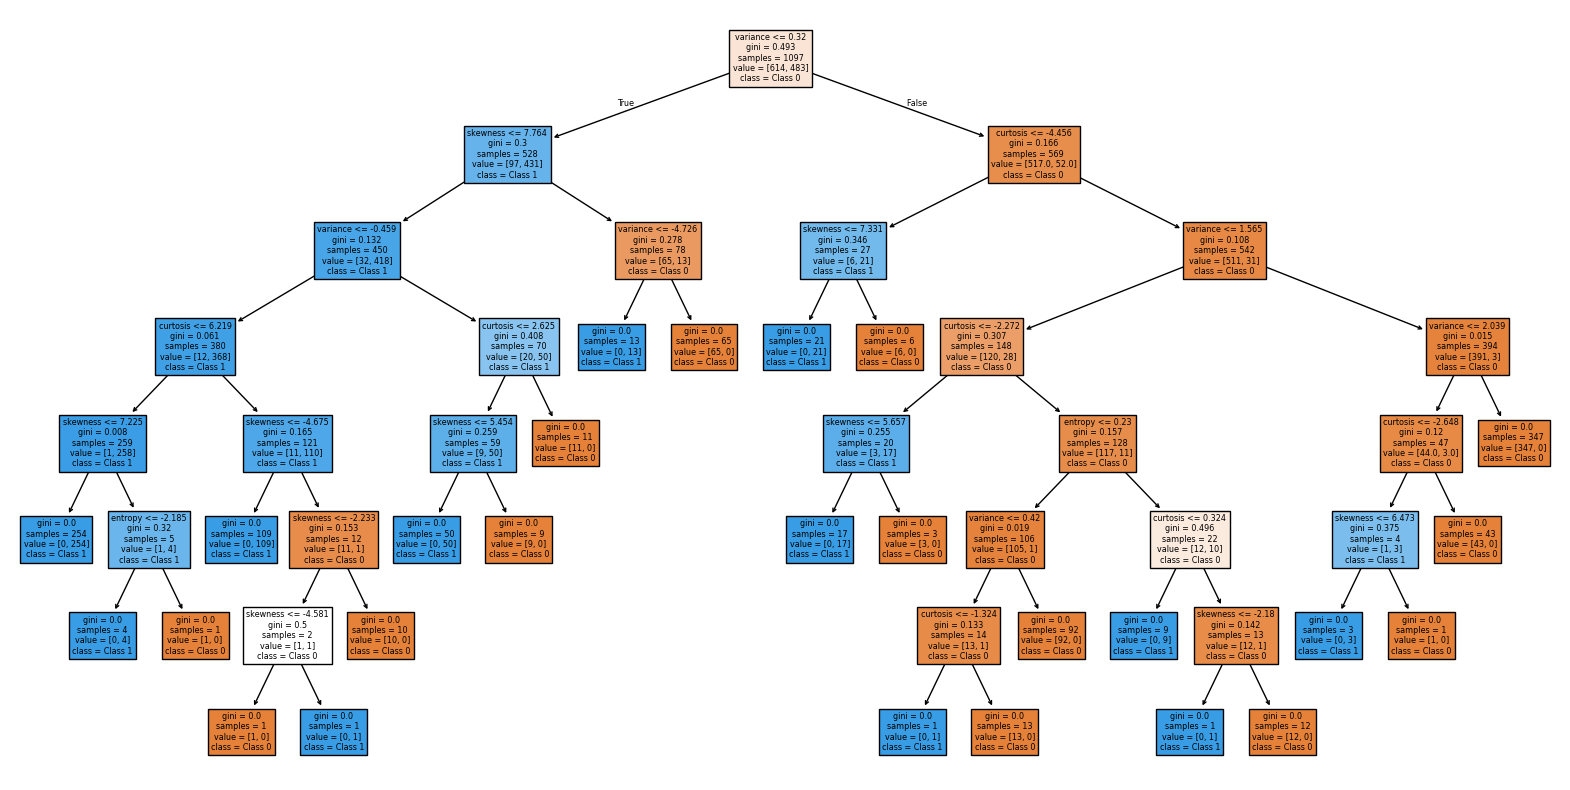

In [69]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [75]:
model = DecisionTreeClassifier()

In [76]:
X = df.drop('class', axis=1)
y = df['class']

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Optimized Model Accuracy: 0.9781818181818182


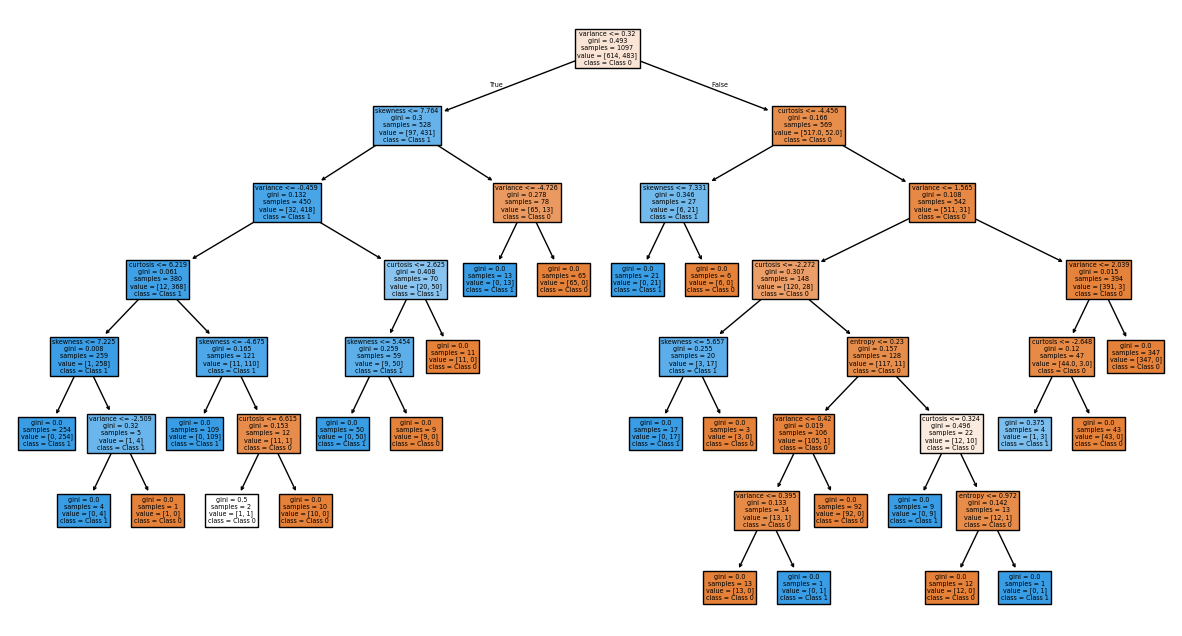

In [79]:

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

y_pred = best_model.predict(X_test)

print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15, 8))
plot_tree(best_model, feature_names=X.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [83]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy is: {accuracy:.4f}')

Accuracy is: 0.9709


In [86]:
pre = precision_score(y_test, y_pred)
print(f'Accuracy is: {pre:.4f}')

Accuracy is: 0.9917


In [87]:
R = recall_score(y_test, y_pred)
print(f'Accuracy is: {R:.4f}')

Accuracy is: 0.9449


In [88]:
f1 = f1_score(y_test, y_pred)
print(f'Accuracy is: {f1:.4f}')

Accuracy is: 0.9677


In [89]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[147   1]
 [  7 120]]


In [1]:

pip install gradio

In [105]:
import gradio as gr

In [106]:
def predict(variance, skewness, curtosis, entropy):
    features = [[variance, skewness, curtosis, entropy]]
    prediction = model.predict(features)
    return "Class: " + str(prediction[0])

In [107]:
inputs = [
    gr.Number(label="Variance"),
    gr.Number(label="Skewness"),
    gr.Number(label="Curtosis"),
    gr.Number(label="Entropy")
]

In [108]:
output = gr.Textbox(label="Predicted Class")


In [109]:
app = gr.Interface(fn=predict, inputs=inputs, outputs=output, title="Banknote Classifier")

In [110]:
app.launch()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
